<AxesSubplot:>

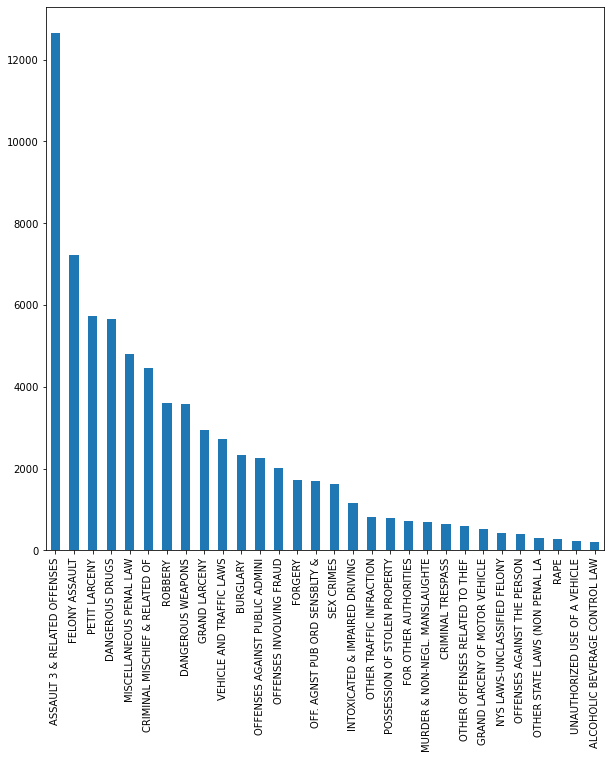

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import glob 

df = pd.read_csv(r"/Users/lf/Desktop/Ironhack_Final_Project/00_DATA_ARCHIVE/NYPD_Arrest_Data__Year_to_Date_.csv")
# df = pd.read_csv(r"C:\Users\Andrew\Documents\Python Scripts\data set\nyc open data\NYPD_Complaint_Data_Historic.csv")

df["ARREST_DATE"] = pd.to_datetime(df["ARREST_DATE"])
df["ARREST_DATE"] = df["ARREST_DATE"].dt.date

'''data exploration:
    1) Who has most arrests? 
    2) Race/gender of arrests?
    3) Offense/Complaint by station?
    4) Arrests by station
    4) Race/gender by arrest by station?
    '''
(df[df["ARREST_DATE"] >= datetime.date(2020, 3, 27)]["OFNS_DESC"].value_counts()[:30]).plot(kind="bar", figsize= (10,10))




In [4]:
'''geographic exploration'''
OFNS_DESC = ["ASSAULT 3 & RELATED OFFENSES", "FELONY ASSAULT", "PETIT LARCENY", "MISCELLANEOUS PENAL LAW"]
plot_df = df[df["OFNS_DESC"].isin(OFNS_DESC)]

BBox = ((df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max()))

#map from openstreetmap
ruh_m = plt.imread(r'/Users/lf/Desktop/Ironhack_Final_Project/00_DATA_ARCHIVE/StreetMap.png')
        
import glob
import moviepy.editor as mpy
from collections import OrderedDict

#mapping consistent colors
unique = plot_df["OFNS_DESC"].unique()
cmap = plt.cm.get_cmap('Set1')
cmap = [cmap(0.1),cmap(0.2),cmap(0.3),cmap(0.4),cmap(0.5)]
palette = dict(zip(unique, cmap))

dates = df["ARREST_DATE"].unique()
for date in dates:
    fig, ax = plt.subplots(figsize = (10,10))
    plot_df_single_day = plot_df[plot_df["ARREST_DATE"] == date]
    
    #plotting nyc complaints
    sns.scatterplot(x = plot_df_single_day["Longitude"], y = plot_df_single_day["Latitude"]
                , hue = plot_df_single_day["OFNS_DESC"], alpha = 0.7, ax = ax,zorder = 10,
                size = 0.1, palette = palette)
    
    #plotting nyc arrests
    
    #creating legend that is consistent and doesn't repeat
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(sorted(zip(labels[1:-3], handles[1:-3])))    
    ax.legend(by_label.values(), by_label.keys(), loc = "upper left")
    
    ax.set_title('Social Distancing 911 Calls NYC on: ' + str(date))
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')
    fig.savefig(r"/Users/lf/Desktop/Ironhack_Final_Project/00_DATA_ARCHIVE/GIF creation\{}.png".format(date), quality = 85)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Andrew\\Documents\\Python Scripts\\Medium Charts\\NYC Open Data\\StreetMap.png'

In [ ]:
gif_name = 'COVID NYC Social Distancing 911 Arrests'
fps = 6
file_list = glob.glob(r'/Users/lf/Desktop/Ironhack_Final_Project/00_DATA_ARCHIVE/GIF creation\*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif(r'/Users/lf/Desktop/Ironhack_Final_Project/00_DATA_ARCHIVE/GIF creation\{}.gif'.format(gif_name), fps=fps)

'''creating a distribution? classification model?'''
#can we predict probability of arrest based off of social distancing complaint location, gender, station? 
#what are the final outputs? 